In [3]:
def forecast_stock(ticker,money):
    ### This function predicts the next day stock and tell us if we should Hold or sell the stock we already have
    
    #importing all the libraries
    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    import tensorflow as tf
    import warnings
    warnings.filterwarnings("ignore")
    plt.style.use('fivethirtyeight')
    from pandas_datareader.data import DataReader
    import datetime
    from datetime import date
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import LSTM
    
    # Setting the start and end dates
    start= date(2020,1,1)
    #end=datetime.date.today()
    end=date(2020,11,20)
    data=DataReader(ticker, data_source='yahoo',start=start, end=end)
    df=list(data['Adj Close'])
    
    # making the X/Y datasets
    X, Y = list(), list()
    for i in range(len(df)):
        end_ix = i + 14
        if end_ix > len(df)-1:
            break
        seq_x, seq_y = df[i:end_ix], df[end_ix]
        X.append(seq_x)
        Y.append(seq_y)
    X=np.array(X)
    Y=np.array(Y)
    X = X.reshape((X.shape[0],X.shape[1],1))
    
    # modeling
    model = Sequential()
    model.add(LSTM(50,activation='relu', return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, Y, epochs=200, batch_size=100, verbose=0, shuffle=False)
    train_predict=model.predict(X)
    
    #plotting the model
    plt.title(ticker)
    plt.plot(data[0:len(X)].index,Y,'b', label='actual value')
    plt.plot(data.index[0:len(X)],train_predict,'r', label='predicted value')
    plt.legend()
    plt.xticks(rotation=45);
    
    #predicting
    train=list(data['Adj Close'][-14:])
    train=np.array(train)
    train=train.reshape(1,train.shape[0],1)
    prod=model.predict(train)
    
    num_of_shares=money/data['Adj Close'][-1]
    future_price=float(prod)*num_of_shares
    
    if future_price<money:
        return {'Status':['SELL'],
                'Future Price':[future_price], 
                'Number of shares':[num_of_shares]}
    else: 
        return {'Status':['HOLD'],
                'Future Price':[future_price], 
                'Number of shares':[num_of_shares]}

{'Status': ['HOLD'],
 'Future Price': [1012.1164460504002],
 'Number of shares': [4.753077631546406]}

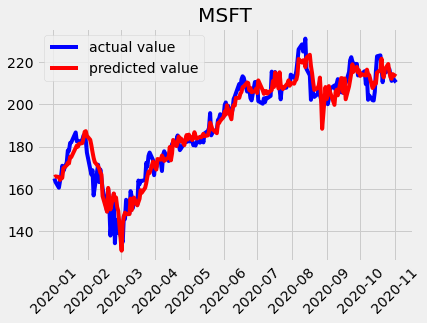

In [7]:
forecast_stock('MSFT',1000)